# Tidal Report Project

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
import pandas as pd
import csv
import scipy
from scipy import optimize
from scipy.optimize import curve_fit

In [45]:
data = ascii.read('ASTR19_S22_group_project_data.txt') #read in the file
df = data.to_pandas()
#df = df.iloc[:, 1:] remove the first column
df.columns = ['Days','X','Y']
print(df) #print the data

for index, row in df.iterrows():
    print(f"X: {row['X']}, Y: {row['Y']}")  #define the X and Y 

def time_to_decimal(time):  #make the time data plottable 
    hours, minutes = map(int, time.split(':'))
    return round(hours + (minutes / 60),2)

x = df['X'].to_numpy()
print(x)

y = df['Y'].to_numpy()
print(y)

high = []
low = []

for i in range(1,41):
    day1 = df[df['Days'] == i]
    day1_sorted = day1.sort_values(by=['Y'])
    low.append(day1_sorted.iloc[0].values.tolist())
    high.append(day1_sorted.iloc[1].values.tolist())

print(high)
print(low)


    Days      X     Y
0      1   8:07  6.57
1      1  15:37 -0.39
2      2   8:55  5.38
3      2  16:25 -1.74
4      3   9:45  5.26
..   ...    ...   ...
77    39  11:15  3.26
78    40   4:29  5.21
79    40  12:22  2.39
80    41   5:21  4.83
81    41  13:14  2.41

[82 rows x 3 columns]
X: 8:07, Y: 6.57
X: 15:37, Y: -0.39
X: 8:55, Y: 5.38
X: 16:25, Y: -1.74
X: 9:45, Y: 5.26
X: 17:14, Y: -1.36
X: 10:35, Y: 4.13
X: 18:00, Y: -1.15
X: 11:28, Y: 3.48
X: 18:46, Y: -1.61
X: 12:22, Y: 2.62
X: 19:31, Y: 0.05
X: 13:24, Y: 1.83
X: 20:16, Y: 1.01
X: 3:22, Y: 3.57
X: 21:01, Y: 0.73
X: 4:07, Y: 4.54
X: 21:46, Y: 2.17
X: 4:50, Y: 3.76
X: 11:58, Y: 2.88
X: 5:31, Y: 3.9
X: 12:56, Y: 1.92
X: 6:08, Y: 4.73
X: 13:45, Y: 1.74
X: 6:47, Y: 5.66
X: 14:25, Y: 0.79
X: 7:22, Y: 5.33
X: 15:00, Y: -0.04
X: 7:59, Y: 5.23
X: 15:34, Y: -1.12
X: 8:34, Y: 6.67
X: 16:08, Y: -0.61
X: 9:10, Y: 4.74
X: 16:41, Y: -0.93
X: 9:45, Y: 4.69
X: 17:12, Y: -1.29
X: 10:21, Y: 4.2
X: 17:45, Y: 0.22
X: 10:57, Y: 3.68
X: 18:15, Y: 0.26

In [46]:
high_x = [time_to_decimal(time[1]) for time in high]
high_y = [time[2] for time in high] 

low_x = [time_to_decimal(time[1]) for time in low]
low_y = [time[2] for time in low]

print(high_x)
print(high_y)
print(low_x)
print(low_y)

[8.12, 8.92, 9.75, 10.58, 11.47, 12.37, 13.4, 3.37, 4.12, 4.83, 5.52, 6.13, 6.78, 7.37, 7.98, 8.57, 9.17, 9.75, 10.35, 10.95, 11.63, 12.42, 2.37, 2.97, 3.62, 4.38, 5.25, 6.15, 7.08, 7.97, 8.83, 9.67, 10.5, 11.32, 12.17, 1.53, 2.22, 2.9, 3.65, 4.48]
[6.57, 5.38, 5.26, 4.13, 3.48, 2.62, 1.83, 3.57, 4.54, 3.76, 3.9, 4.73, 5.66, 5.33, 5.23, 6.67, 4.74, 4.69, 4.2, 3.68, 2.47, 2.59, 4.1, 3.17, 3.71, 4.04, 4.07, 5.93, 6.89, 6.72, 6.77, 5.77, 4.35, 4.23, 2.24, 3.45, 4.13, 3.34, 3.32, 5.21]
[15.62, 16.42, 17.23, 18.0, 18.77, 19.52, 20.27, 21.02, 21.77, 11.97, 12.93, 13.75, 14.42, 15.0, 15.57, 16.13, 16.68, 17.2, 17.75, 18.25, 18.8, 19.33, 19.87, 20.5, 10.73, 11.92, 12.95, 13.83, 14.65, 15.45, 16.17, 16.87, 17.57, 18.2, 18.82, 19.4, 20.0, 9.9, 11.25, 12.37]
[-0.39, -1.74, -1.36, -1.15, -1.61, 0.05, 1.01, 0.73, 2.17, 2.88, 1.92, 1.74, 0.79, -0.04, -1.12, -0.61, -0.93, -1.29, 0.22, 0.26, 0.36, 0.99, 1.87, 1.6, 3.1, 2.49, 2.18, 0.7, 0.21, 0.22, -1.68, -1.32, -0.73, -0.38, -0.61, -0.46, 1.21, 2.58, 

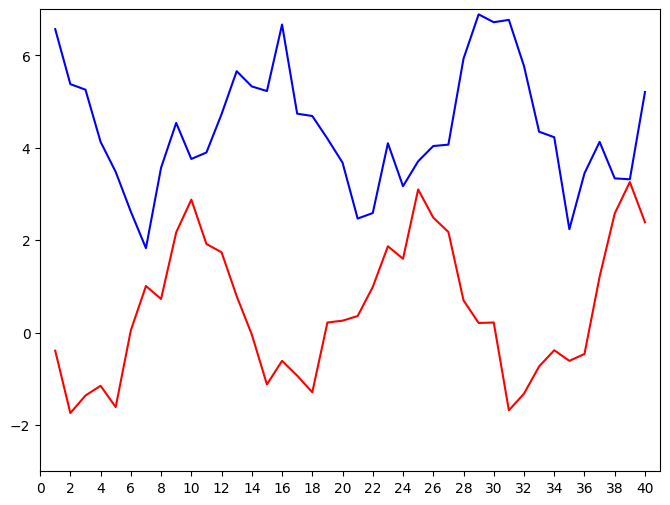

In [49]:
plt.figure(figsize=(8,6))

plt.xlim(0, 41)
plt.xticks(range(0, 41, 2))
plt.ylim(-3, 7)

x_a=[i for i in range(1,41)]
plt.plot( x_a,high_y,color='blue', label='Inter-day')
plt.plot( x_a,low_y,color='red', label='Intra-day')

plt.savefig('oscillating_graph.pdf', bbox_inches='tight', facecolor='white')

In [18]:
Y = [6.57, -0.39, 5.38, -1.74, 5.26, -1.36, 4.13, -1.15, 3.48, -1.61, 2.62, 0.05, 1.83, 1.01, 3.57, 0.73, 4.54, 2.17, 3.76, 2.88, 3.90, 1.92, 4.73, 1.74, 5.66, 0.79, 5.33, -0.04, 5.23, -1.12, 6.67, -0.61, 4.74, -0.93, 4.69, -1.29, 4.20, 0.22, 3.68, 0.26, 2.47, 0.36, 2.59, 0.99, 4.10, 1.87, 3.17, 1.60, 3.71, 3.10, 4.04, 2.49, 4.07, 2.18, 5.93, 0.70, 6.89, 0.21, 6.72, 0.22, 6.77, -1.68, 5.77,-1.32, 4.35, -0.73, 4.23, -0.38, 2.24, -0.61, 3.45, -0.46, 4.13, 1.21, 3.34, 2.58, 3.32, 3.26, 5.21, 2.39, 4.83, 2.41]

Inter_day = []
Intra_day = []

for i in range(len(Y)):
    if i % 2 == 0:
        Inter_day.append(Y[i])
    else:
        Intra_day.append(Y[i])

print("Inter_day:", Inter_day)
print("Intra_day:", Intra_day)

Inter_day: [6.57, 5.38, 5.26, 4.13, 3.48, 2.62, 1.83, 3.57, 4.54, 3.76, 3.9, 4.73, 5.66, 5.33, 5.23, 6.67, 4.74, 4.69, 4.2, 3.68, 2.47, 2.59, 4.1, 3.17, 3.71, 4.04, 4.07, 5.93, 6.89, 6.72, 6.77, 5.77, 4.35, 4.23, 2.24, 3.45, 4.13, 3.34, 3.32, 5.21, 4.83]
Intra_day: [-0.39, -1.74, -1.36, -1.15, -1.61, 0.05, 1.01, 0.73, 2.17, 2.88, 1.92, 1.74, 0.79, -0.04, -1.12, -0.61, -0.93, -1.29, 0.22, 0.26, 0.36, 0.99, 1.87, 1.6, 3.1, 2.49, 2.18, 0.7, 0.21, 0.22, -1.68, -1.32, -0.73, -0.38, -0.61, -0.46, 1.21, 2.58, 3.26, 2.39, 2.41]


In [19]:
X = [8.12, 15.62, 8.92, 16.42, 9.75, 17.23, 10.58, 18.0, 11.47, 18.77, 12.37, 19.52, 13.4, 20.27, 3.37, 21.02, 4.12, 21.77, 4.83, 11.97, 5.52, 12.93, 6.13, 13.75, 6.78, 14.42, 7.37, 15.0, 7.98, 15.57, 8.57, 16.13, 9.17, 16.68, 9.75, 17.2, 10.35, 17.75, 10.95, 18.25, 11.63, 18.8, 12.42, 19.33, 2.37, 19.87, 2.97, 20.5, 3.62, 10.73, 4.38, 11.92, 5.25, 12.95, 6.15, 13.83, 7.08, 14.65, 7.97, 15.45, 8.83, 16.17, 9.67, 16.87, 10.5, 17.57, 11.32, 18.2, 12.17, 18.82, 1.53, 19.4, 2.22, 20.0, 2.9, 9.9, 3.65, 11.25, 4.48, 12.37, 5.35, 13.23]

Inter_day_time = []
Intra_day_time = []

for i in range(len(X)):
    if i % 2 == 0:
        Inter_day_time.append(X[i])
    else:
        Intra_day_time.append(X[i])
        
print("Inter_day_time:", Inter_day_time)
print("Intra_day_time:", Intra_day_time)


Inter_day_time: [8.12, 8.92, 9.75, 10.58, 11.47, 12.37, 13.4, 3.37, 4.12, 4.83, 5.52, 6.13, 6.78, 7.37, 7.98, 8.57, 9.17, 9.75, 10.35, 10.95, 11.63, 12.42, 2.37, 2.97, 3.62, 4.38, 5.25, 6.15, 7.08, 7.97, 8.83, 9.67, 10.5, 11.32, 12.17, 1.53, 2.22, 2.9, 3.65, 4.48, 5.35]
Intra_day_time: [15.62, 16.42, 17.23, 18.0, 18.77, 19.52, 20.27, 21.02, 21.77, 11.97, 12.93, 13.75, 14.42, 15.0, 15.57, 16.13, 16.68, 17.2, 17.75, 18.25, 18.8, 19.33, 19.87, 20.5, 10.73, 11.92, 12.95, 13.83, 14.65, 15.45, 16.17, 16.87, 17.57, 18.2, 18.82, 19.4, 20.0, 9.9, 11.25, 12.37, 13.23]


In [20]:
X_set_1 = [8.12, 8.92, 9.75, 10.58, 11.47, 12.37, 13.4, 3.37, 4.12, 4.83, 5.52, 6.13, 6.78, 7.37, 7.98, 8.57, 9.17, 9.75, 10.35, 10.95, 11.63, 12.42, 2.37, 2.97, 3.62, 4.38, 5.25, 6.15, 7.08, 7.97, 8.83, 9.67, 10.5, 11.32, 12.17, 1.53, 2.22, 2.9, 3.65, 4.48, 5.35]
X_set_2 = [15.62, 16.42, 17.23, 18.0, 18.77, 19.52, 20.27, 21.02, 21.77, 11.97, 12.93, 13.75, 14.42, 15.0, 15.57, 16.13, 16.68, 17.2, 17.75, 18.25, 18.8, 19.33, 19.87, 20.5, 10.73, 11.92, 12.95, 13.83, 14.65, 15.45, 16.17, 16.87, 17.57, 18.2, 18.82, 19.4, 20.0, 9.9, 11.25, 12.37, 13.23]

Y_set_1 = [6.57, 5.38, 5.26, 4.13, 3.48, 2.62, 1.83, 3.57, 4.54, 3.76, 3.9, 4.73, 5.66, 5.33, 5.23, 6.67, 4.74, 4.69, 4.2, 3.68, 2.47, 2.59, 4.1, 3.17, 3.71, 4.04, 4.07, 5.93, 6.89, 6.72, 6.77, 5.77, 4.35, 4.23, 2.24, 3.45, 4.13, 3.34, 3.32, 5.21, 4.83]
Y_set_2 = [-0.39, -1.74, -1.36, -1.15, -1.61, 0.05, 1.01, 0.73, 2.17, 2.88, 1.92, 1.74, 0.79, -0.04, -1.12, -0.61, -0.93, -1.29, 0.22, 0.26, 0.36, 0.99, 1.87, 1.6, 3.1, 2.49, 2.18, 0.7, 0.21, 0.22, -1.68, -1.32, -0.73, -0.38, -0.61, -0.46, 1.21, 2.58, 3.26, 2.39, 2.41]

associated_data = []
for x1, y1, x2, y2 in zip(X_set_1, Y_set_1, X_set_2, Y_set_2):
    associated_data.append(((x1, y1), (x2,y2)))

for pair in associated_data:
    print(f"Inter_day: {pair[0]} = Intra_day: {pair[1]}")

Inter_day: (8.12, 6.57) = Intra_day: (15.62, -0.39)
Inter_day: (8.92, 5.38) = Intra_day: (16.42, -1.74)
Inter_day: (9.75, 5.26) = Intra_day: (17.23, -1.36)
Inter_day: (10.58, 4.13) = Intra_day: (18.0, -1.15)
Inter_day: (11.47, 3.48) = Intra_day: (18.77, -1.61)
Inter_day: (12.37, 2.62) = Intra_day: (19.52, 0.05)
Inter_day: (13.4, 1.83) = Intra_day: (20.27, 1.01)
Inter_day: (3.37, 3.57) = Intra_day: (21.02, 0.73)
Inter_day: (4.12, 4.54) = Intra_day: (21.77, 2.17)
Inter_day: (4.83, 3.76) = Intra_day: (11.97, 2.88)
Inter_day: (5.52, 3.9) = Intra_day: (12.93, 1.92)
Inter_day: (6.13, 4.73) = Intra_day: (13.75, 1.74)
Inter_day: (6.78, 5.66) = Intra_day: (14.42, 0.79)
Inter_day: (7.37, 5.33) = Intra_day: (15.0, -0.04)
Inter_day: (7.98, 5.23) = Intra_day: (15.57, -1.12)
Inter_day: (8.57, 6.67) = Intra_day: (16.13, -0.61)
Inter_day: (9.17, 4.74) = Intra_day: (16.68, -0.93)
Inter_day: (9.75, 4.69) = Intra_day: (17.2, -1.29)
Inter_day: (10.35, 4.2) = Intra_day: (17.75, 0.22)
Inter_day: (10.95, 3.6

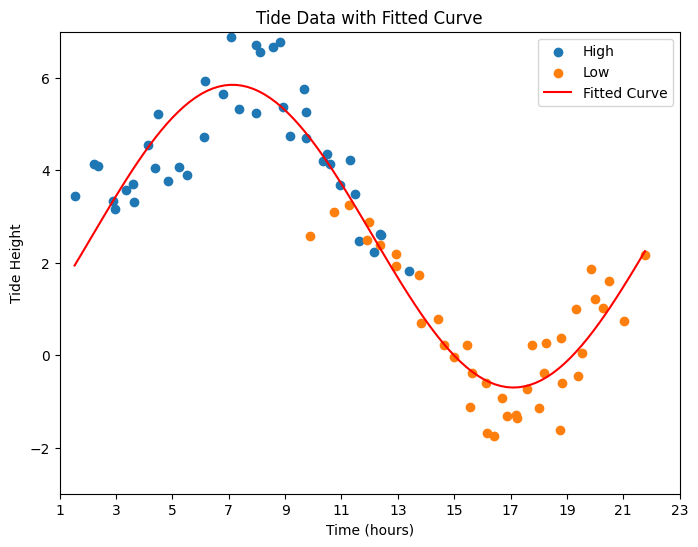

<Figure size 640x480 with 0 Axes>

In [50]:
# Combining x and y values for curve fitting
x_combined = high_x + low_x
y_combined = high_y + low_y


# Define the function to fit (sine wave)
def oscillatory_function(x, amplitude, frequency, phase_shift, vertical_shift):
    return amplitude * np.sin(2 * np.pi * frequency * x + phase_shift) + vertical_shift

# Fitting the function to the data
initial_guess = [5, 0.1, 0, 0]  # Initial guess for the parameters
params, covariance = curve_fit(oscillatory_function, x_combined, y_combined, p0=initial_guess)

# Generate points for the fitted curve
x_curve = np.linspace(min(x_combined), max(x_combined), 100)
y_curve = oscillatory_function(x_curve, *params)

# Plotting the data points and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(high_x, high_y, label='High')
plt.scatter(low_x, low_y, label='Low')
plt.plot(x_curve, y_curve, color='red', label='Fitted Curve')

"""plt.figure()
plt.scatter( high_x,high_y,color='blue', label='Inter-day')
plt.scatter(low_x,low_y, color='red', label='Intra-day')
plt.xlabel("x")
plt.ylabel("y")
plt.show()"""

# Set limits and ticks for X and Y axes
plt.xlim(1, 23)
plt.xticks(range(1, 24, 2))
plt.ylim(-3, 7)

# Labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('Tide Height')
plt.legend()
plt.title('Tide Data with Fitted Curve')

plt.show()
plt.savefig('Data_fitted_curve.pdf', bbox_inches='tight', facecolor='white')

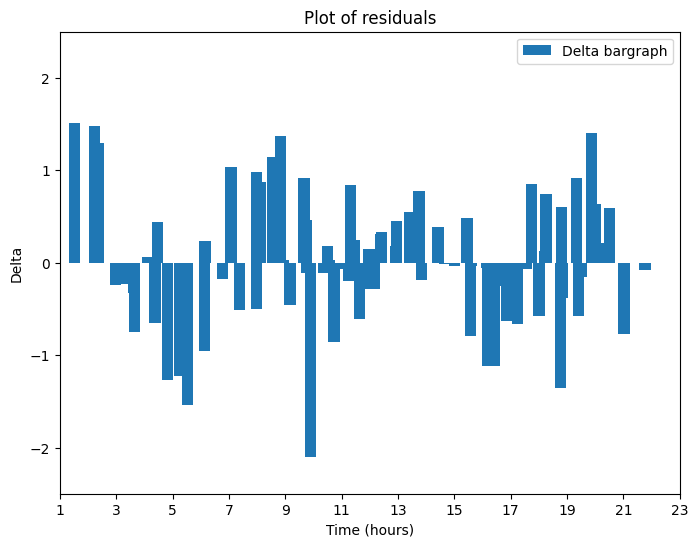

<Figure size 640x480 with 0 Axes>

In [52]:
# Combining x and y values for curve fitting
x_combined = high_x + low_x
y_combined = high_y + low_y


# Define the function to fit (sine wave)
def oscillatory_function(x, amplitude, frequency, phase_shift, vertical_shift):
    return amplitude * np.sin(2.0 * np.pi * frequency * x + phase_shift) + vertical_shift

# Fitting the function to the data
initial_guess = [5, 0.1, 0, 0]  # Initial guess for the parameters
params, covariance = curve_fit(oscillatory_function, x_combined, y_combined, p0=initial_guess)

# Generate points for the fitted curve
x_curve = np.linspace(min(x_combined), max(x_combined), 100)
y_curve = oscillatory_function(x_curve, *params)
high_y_curve = oscillatory_function(np.array(x_combined), *params)


#array of x_combined 
xc=np.array(x_combined)

#creating delta
delta=[]

for i in range(len(high_y_curve)):
    real_y = y_combined[i]
    calc_y = high_y_curve[i]
    d = real_y - calc_y
    delta.append(d)

#creating a bargraph of delta
plt.figure(figsize = (8,6))
plt.bar(xc, delta, width = 0.4, label='Delta bargraph')

#plt.scatter(xc, delta, color='blue', label='Delta bargraph')

# Set limits and ticks for X and Y axes
plt.xlim(1, 23)
plt.xticks(range(1, 24, 2))
plt.ylim(-2.5, 2.5)

# Labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('Delta')
plt.legend()
plt.title('Plot of residuals')

plt.show()
plt.savefig('plotted_residuals.pdf', bbox_inches='tight', facecolor='white')


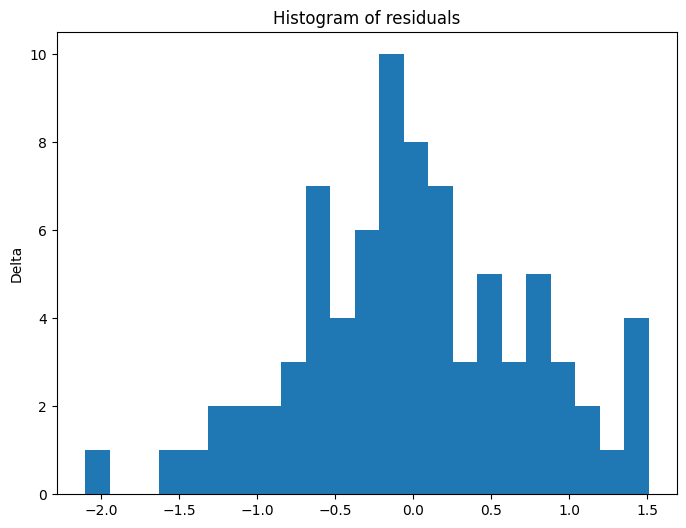

<Figure size 640x480 with 0 Axes>

In [54]:
# Combining x and y values for curve fitting
x_combined = high_x + low_x
y_combined = high_y + low_y


# Define the function to fit (sine wave)
def oscillatory_function(x, amplitude, frequency, phase_shift, vertical_shift):
    return amplitude * np.sin(2.0 * np.pi * frequency * x + phase_shift) + vertical_shift

# Fitting the function to the data
initial_guess = [5, 0.1, 0, 0]  # Initial guess for the parameters
params, covariance = curve_fit(oscillatory_function, x_combined, y_combined, p0=initial_guess)

#create the
high_y_curve = oscillatory_function(np.array(x_combined), *params)


#array of x_combined 
xc=np.array(x_combined)

#creating delta
delta=[]

for i in range(len(high_y_curve)):
    real_y = y_combined[i]
    calc_y = high_y_curve[i]
    d = real_y - calc_y
    delta.append(d)

#creating a bargraph of delta
plt.figure(figsize = (8,6))
plt.hist(delta, bins=23)

#plt.scatter(xc, delta, color='blue', label='Delta bargraph')

# Set limits and ticks for X and Y axes
#plt.xlim(1, 23)
#plt.xticks(range(1, 24, 2))
#plt.ylim(-2.5, 2.5)

# Labels and legend

plt.ylabel('Delta')
#plt.legend()
plt.title('Histogram of residuals')

plt.show()
plt.savefig('histogram_residuals.pdf', bbox_inches='tight', facecolor='white')